In [2]:
# 정규방정식 테스트

import numpy as np

X = 2*np.random.rand(100,1)
y=4+3*X+np.random.rand(100,1)

In [3]:
'''theta^hat 계산
넘파이 선형대수 모듈 (np.linalg)의 inv() 함수를 이용해 역행렬 계산
dot() 메서드: 행렬 곱셈'''

X_b = np.c_[np.ones((100,1)), X]    # 모든 샘플에 X0=1을 추가한다
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.43340165],
       [3.011199  ]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  # 모든 샘플에 X0=1을 추가한다
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.43340165],
       [10.45579966]])

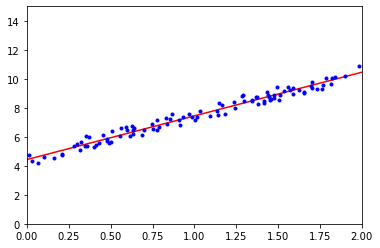

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
'''사이킷런에서 선형 회귀 수행'''

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [7]:
lin_reg.intercept_, lin_reg.coef_, lin_reg.predict(X_new)

(array([4.43340165]),
 array([[3.011199]]),
 array([[ 4.43340165],
        [10.45579966]]))

In [8]:
'''
LinearRegression 클래스는 scipy.linalg.lstsq() 함수를 기반으로 하며, 이 함수는 직접 호출할 수 있다.
'''

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)  
                                # rcond = SVD 과정에서 singular value cut-off threshold - 해당 설정값보다 작으면 0취급
theta_best_svd

array([[4.43340165],
       [3.011199  ]])

In [9]:
'''Psedoinverse (유사역행렬) 계산'''

np.linalg.pinv(X_b).dot(y)

array([[4.43340165],
       [3.011199  ]])

pseudo-inverse는 SVD를 통해 계산된다.


In [10]:
eta = 0.1   # learning rate
n_iteration = 1000
m = 100

theta = np.random.randn(2,1)    # Random initialization

for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

theta       # 정규 방정식으로 얻은 것과 결과값이 같다

array([[4.43340165],
       [3.011199  ]])

In [11]:
'''Stochastic gradient descent'''

n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)    # random initialization

for epoch in range(n_epochs):
    for i in range(m):      # m: 훈련 데이터의 샘플 수 - 이 경우 1 epoch: m번의 iteration
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients


In [12]:
'''Stochastic gradient descent'''

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.41042896]), array([3.04147936]))

In [13]:
'''다항 회귀'''

m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 +X + 2 + np.random.randn(m,1)

In [14]:
''' 
직선이 맞지 않는 데이터 분포 형태를 제곱 형태로 데이터 변환 시켜주어 직선 그래프에 맞도록 변형시켜준다
'''
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-1.96319439]), array([-1.96319439,  3.85413223]))

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.15079248]), array([[0.97207163, 0.48694924]]))

In [16]:
'''학습 곡선 확인을 통한 over/under fitting 확인'''

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = '훈련 세트')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = '검증 코드')

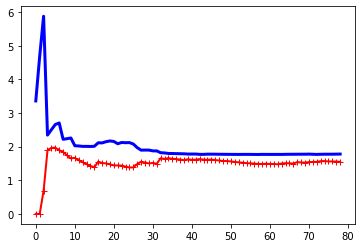

In [17]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

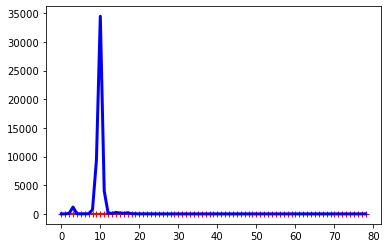

In [18]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias = False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

In [19]:
'''Ridge regression'''
'''사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예'''
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.13034191]])

In [20]:
'''확률적 경사 하강법을 사용한 경우'''
sdg_reg = SGDRegressor(penalty='l2') # l2: SGD가 비용함수에 가중치 벡터의 l2 노름의 제곱을 2로 나눈 규제항을 추가하게 함. 즉, 릿지 회귀. 
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.92902851])

In [21]:
'''Lasso regression'''
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

'''Lasso 대신 SGDRegressor(penalty='l1') 사용 가능'''

array([5.08185571])

In [22]:
'''Elastic Net'''
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.08157837])

In [ ]:
'''Early stopping (조기 종료)'''
from copy import deepcopy

# 데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate = 'constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)   # 훈련을 이어서 진행한다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [1]:
'''로지스틱 회귀'''
'''Iris-versicolor 종 감지 분류기 만들기'''
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [2]:
X = iris['data'][:,3:]  # 꽃잎의 너비
y = (iris['target'] == 2).astype(int)   # Iris-Virginica = 1, 아니면 = 0

X,y

(array([[0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.4],
        [0.3],
        [0.2],
        [0.2],
        [0.1],
        [0.2],
        [0.2],
        [0.1],
        [0.1],
        [0.2],
        [0.4],
        [0.4],
        [0.3],
        [0.3],
        [0.3],
        [0.2],
        [0.4],
        [0.2],
        [0.5],
        [0.2],
        [0.2],
        [0.4],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.4],
        [0.1],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.1],
        [0.2],
        [0.2],
        [0.3],
        [0.3],
        [0.2],
        [0.6],
        [0.4],
        [0.3],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [1.4],
        [1.5],
        [1.5],
        [1.3],
        [1.5],
        [1.3],
        [1.6],
        [1. ],
        [1.3],
        [1.4],
        [1. ],
        [1.5],
        [1. ],
        [1.4],
        [1.3],
        [1.4],
        [1

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

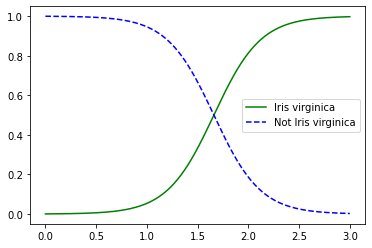

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not Iris virginica')
plt.legend()

In [8]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [10]:
X = iris['data'][:, (2,3)]  # 꽃잎 길이, 꽃잎 너비
y = iris['target']

'''소프드맥스 회귀를 사용하기 위해 multi_class 매개변수를 'multinomial' 로 바꾸고
solver 매개변수에 대해 소프드맥스 회귀를 지원하는 알고리즘을 지정해야 한다.'''
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
softmax_reg.fit(X,y)

LogisticRegression(multi_class='multinomial')

In [11]:
softmax_reg.predict([[5,2]])

array([2])

In [12]:
softmax_reg.predict_proba([[5,2]])

array([[2.43559894e-04, 2.14859516e-01, 7.84896924e-01]])